In [57]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text

import nfl_data_py as nfl

In [58]:
years = range(1999, 2023)

In [59]:
columns = ['season', 'posteam', 'season_type', 'defteam', 'play', 'play_type', 'receiver_player_id', 'epa', 'complete_pass']

In [60]:
data = nfl.import_pbp_data(years, cache=True, alt_path="../cache", columns=columns)

1999 done.
2000 done.
2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [61]:
df = data[(data['season_type'] == 'REG') & (data['play_type'] == 'pass') & (data['play'] == 1) & (data['complete_pass'] == 1)]

In [62]:
ids = nfl.import_ids()

In [63]:
ids = ids[['gsis_id', 'position']]

In [64]:
df = df.merge(ids, left_on='receiver_player_id', right_on='gsis_id', how='inner')

In [65]:
df = df[df['position'] == 'TE']

In [66]:
# Sum by defteam to get total epa allowed to TEs
df = df.groupby(['season', 'defteam']).sum().reset_index()

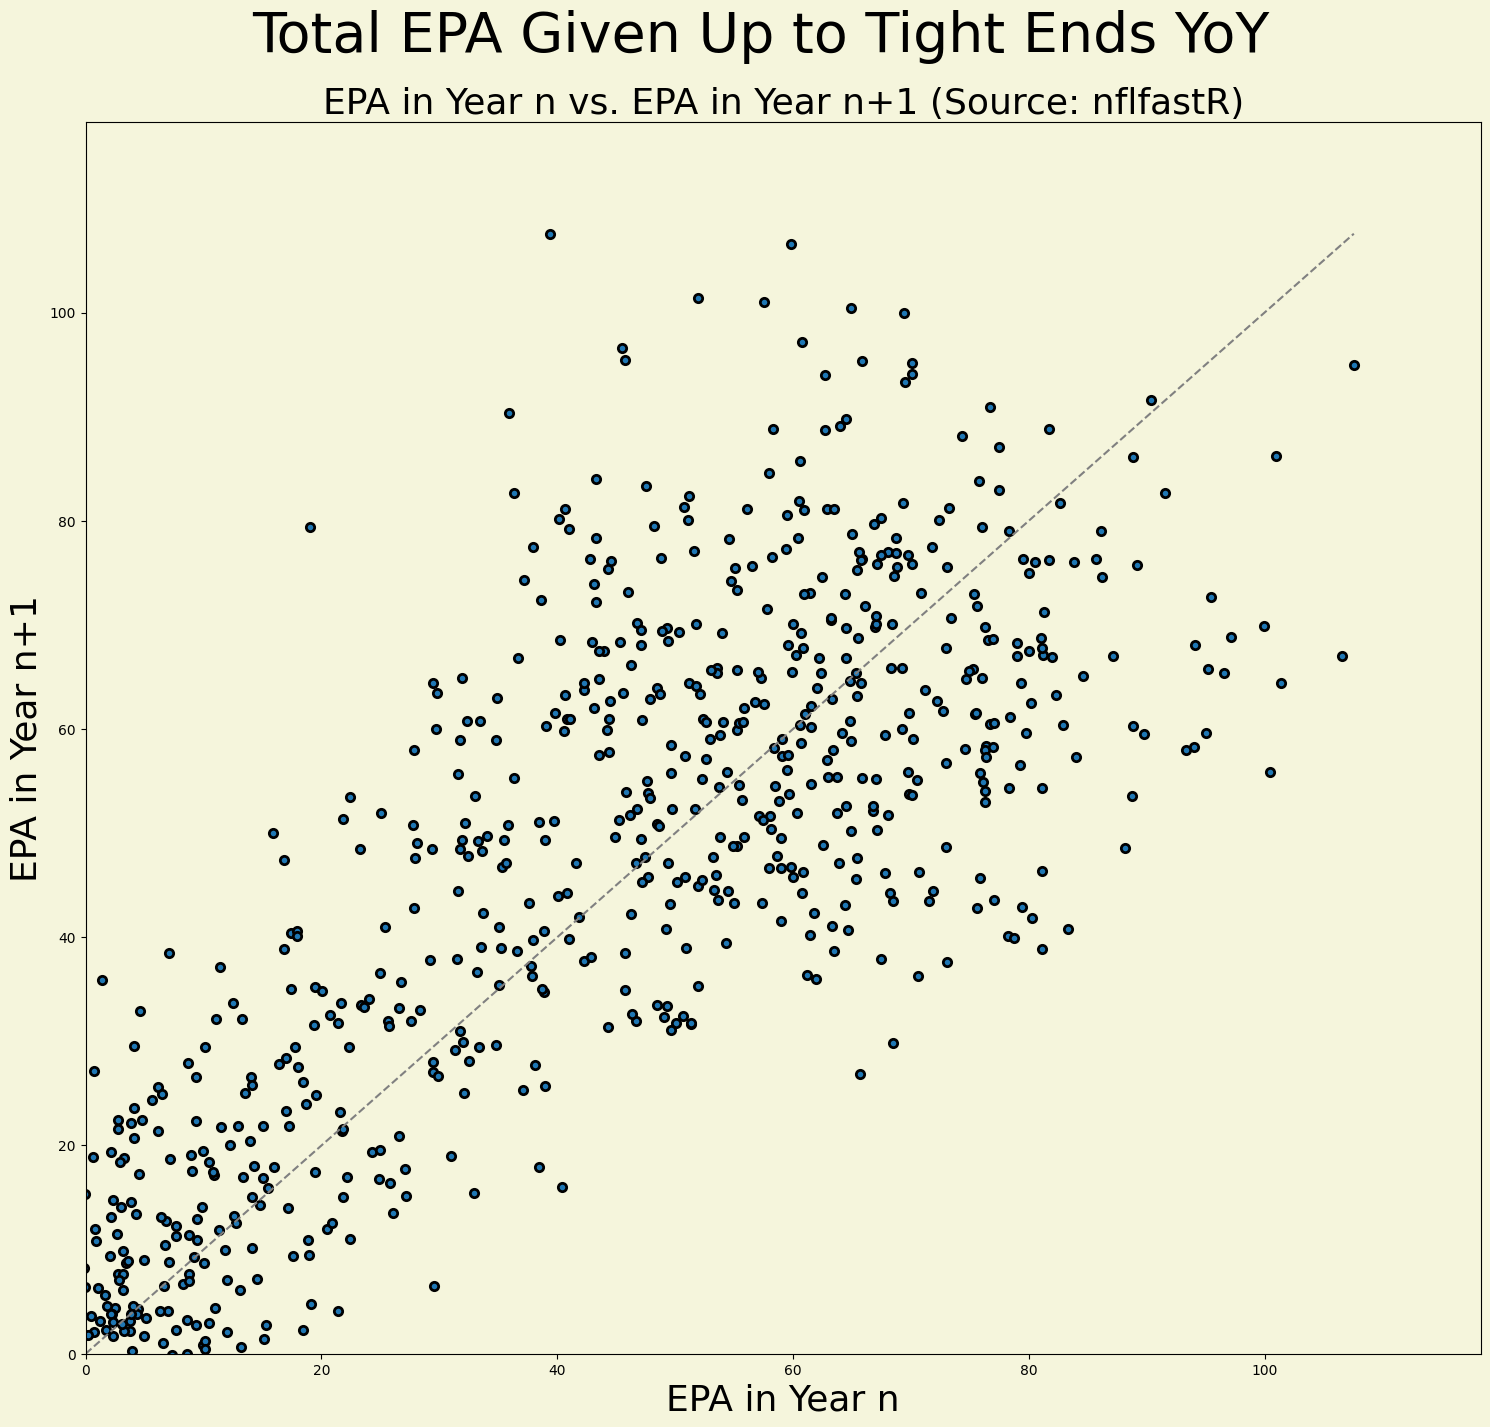

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text  # Import this library for label adjustments

# Assuming you have a dataframe named 'df' with columns 'season', 'defteam', and 'epa'

# Calculate epa in year n+1
df['epa_next_year'] = df.groupby('defteam')['epa'].shift(-1)

fig, ax = plt.subplots(figsize=(18, 16))

fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')

# Calculate point size relative to 'epa' values
scatter = ax.scatter(df['epa'], df['epa_next_year'],
                     edgecolor='black', linewidth=2)


plt.suptitle("Total EPA Given Up to Tight Ends YoY",
             fontsize=40, y=0.95, ha='center')
plt.title("EPA in Year n vs. EPA in Year n+1 (Source: nflfastR)",
          fontsize=26, y=1.0, ha='center')
plt.xlabel('EPA in Year n', fontsize=26)
plt.ylabel('EPA in Year n+1', fontsize=26)

# Set the axes limits
x_max = df['epa'].max()
y_max = df['epa_next_year'].max()
plt.xlim(0, x_max * 1.1)
plt.ylim(0, y_max * 1.1)

# Draw diagonal line for reference
plt.plot([0, x_max], [0, y_max], color='gray', linestyle='--')

# Save the plot as a high-quality image
plt.savefig('../images/TE_epa_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
